In [242]:
%pylab inline
from scipy import sparse,stats
from scipy.io import loadmat
from scipy.spatial.distance import cdist
from scipy.sparse.linalg import svds, eigs
from scipy.linalg import block_diag,qr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from numpy.matlib import repmat

Populating the interactive namespace from numpy and matplotlib


/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['qr']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Functions

WM

SHOW

SHOW3

COL

In [243]:
def WM(A,B, sigma):
    
    dist = cdist(A,B)
    
    return exp(-dist*dist/sigma)

In [244]:
def SHOW(X,Y,col,tit='output',siz=2,save=0):
    plt.scatter(X, Y, s=siz, c=col)
    
    plt.title(tit)
    plt.gcf().set_size_inches(6,6)
    if save: plt.savefig('Result/' + tit + '.png')
    plt.show()

In [245]:
def SHOW3(X,Y,Z,col,tit='output',siz=2,save=0):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X, Y, Z, s=siz, c=col)
    
    plt.title(tit)
    plt.gcf().set_size_inches(6,6)
    if save: plt.savefig('Result/' + tit + '.png')
    plt.show()

In [246]:
def COL(emb,n,cluster):

    kmeans = KMeans(cluster)
    kmeans = kmeans.fit(emb)
    label  = array(kmeans.predict(emb)).reshape(n,1)
    
    cmap = cm.rainbow
    norm = Normalize(1, cluster)
    col  = cmap(norm(label+1)).reshape(n,4)
    
    return col

# Variables

X: data points, size n

Y: add points,  size m

_--------------------------------------------------------------------

dim: embedded dimension

cluster: cluster number 

sigma: global scaling parameter

In [249]:
ori = loadmat('Data/swissroll2000.mat')['A']

In [250]:
n = 1800
m = ori.shape[0]-n

X = ori[:n,:]
Y = ori[n:,:]

print('n = ',n)
print('m = ',m)

n =  1800
m =  200


In [251]:
dim     = 10
cluster = 5
sigma   = .5

# Data points and add points

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


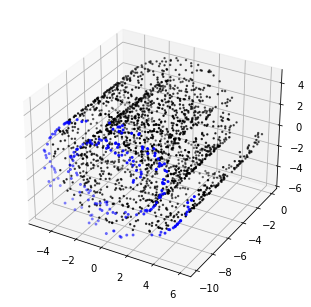

In [252]:
fig = plt.figure()
ax  = Axes3D(fig)
ax.scatter(X[:,0],-X[:,1],X[:,2],s=2,c='k')
ax.scatter(Y[:,0],-Y[:,1],Y[:,2],s=4,c='b')

In [186]:
def DM(data,sigma,dim):

    W = WM(data,data,sigma)
    
    tmp = 1/sqrt(sum(W,axis=1))
    D = diag(tmp)    
    Q = D.dot(W).dot(D)

    ### find Q's (and thus the probability mat's) eigval and eigvec
    U,S,V = svds(Q,dim+1)

    L = diag(S[::-1])
    U = U[:,::-1]
    
    ### construct diffusion map
    EMB = D.dot(U).dot(L)

    return EMB, S[::-1], U, tmp

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


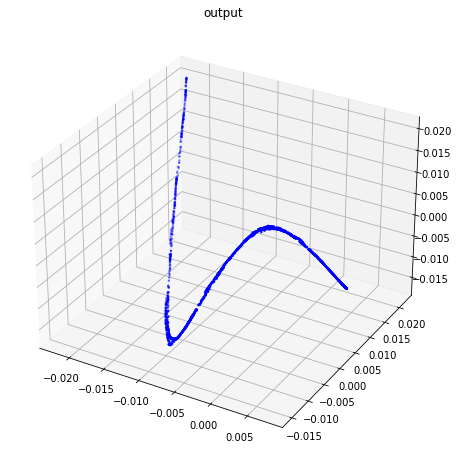

CPU times: user 4.01 s, sys: 880 ms, total: 4.89 s
Wall time: 996 ms


In [187]:
%%time
EMBdm, EIGdm, U,D = DM(X,sigma,dim)

SHOW3(EMBdm[:,1],EMBdm[:,2],EMBdm[:,3],'b')

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


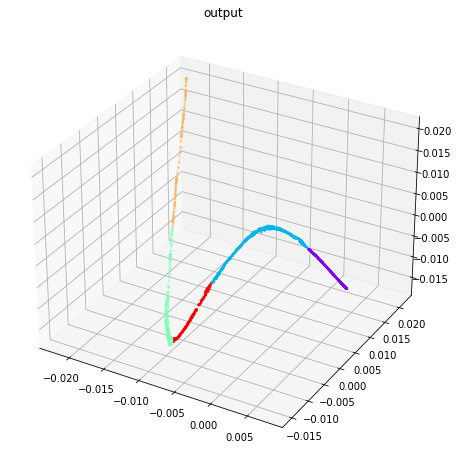

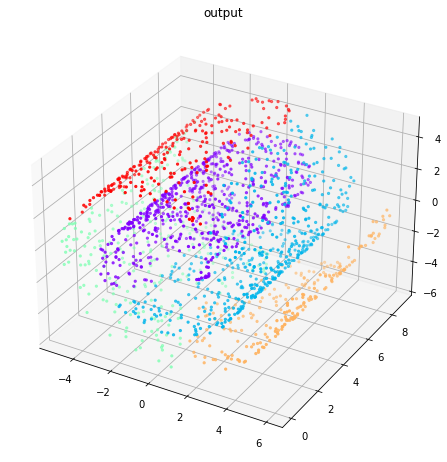

In [195]:
COLdm = COL(EMBdm[:,1:4],n,cluster)
SHOW3(EMBdm[:,1],EMBdm[:,2],EMBdm[:,3],COLdm)
SHOW3(X[:,0],X[:,1],X[:,2],COLdm,siz=5)

# Add points (using Nystrom method)

In [196]:
def nystrom(EMB,EIG, add,landmark,sigma):
    
    ### construct W
    Wadd = WM(add,landmark,sigma)
    
    ### construct D
    Dadd = diag(1/sum(Wadd,axis=1))

    ### extension
    EMBadd = Dadd.dot(Wadd).dot(EMB).dot(diag(1/EIG))
    EMBext = vstack((EMB,EMBadd)) 
    
    return EMBext

In [197]:
%%time
EMBnys = nystrom(EMBdm,EIGdm, Y,X,sigma)

CPU times: user 12.2 ms, sys: 4.48 ms, total: 16.7 ms
Wall time: 8.59 ms


/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


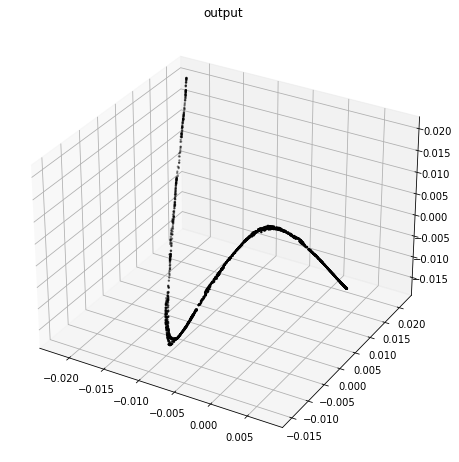

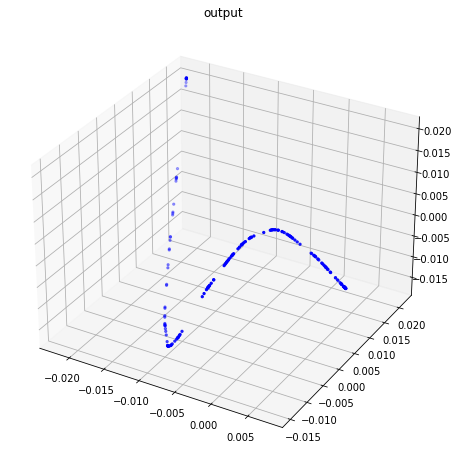

In [198]:
SHOW3(EMBnys[:n,1], EMBnys[:n,2],EMBnys[:n,3],'k')
SHOW3(EMBnys[n:,1], EMBnys[n:,2],EMBnys[n:,3],'b',siz=5)

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


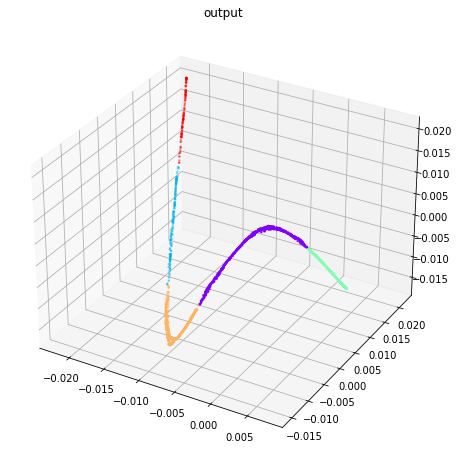

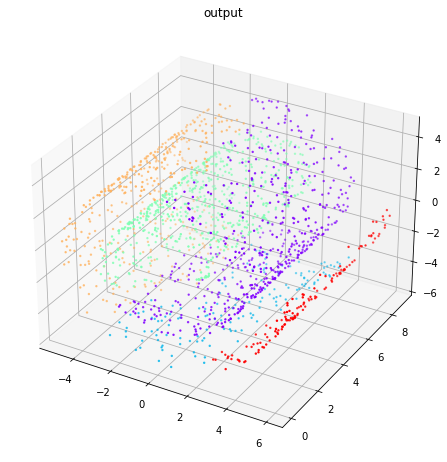

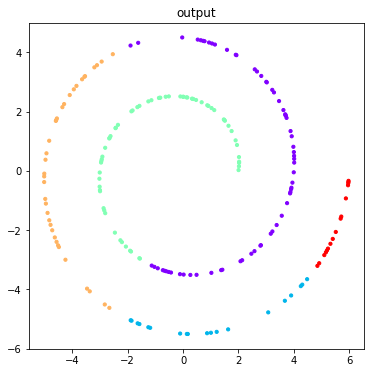

In [199]:
COLnys = COL(EMBnys[:,1:4],n+m,cluster)
SHOW3(EMBnys[:,1],EMBnys[:,2],EMBnys[:,3],COLnys)
SHOW3(X[:,0],X[:,1],X[:,2],COLnys[:n,:])
SHOW(Y[:,0],Y[:,2],COLnys[n:,:],siz=10)

# Add points (modify SVD)

In [222]:
def modiSVD(EMB,EIGVEC, add,landmark,sigma, U,D, dim):
        
    ### compute the added random walk matrix rows
    r = add.shape[0]
    ### construct W
    Wsm = WM(add,landmark, sigma)
        
    ### construct D
    tmp0 = 1/sqrt(sum(Wsm,axis=1))
    tmp0 = hstack((D,tmp0))
    Dsm  = diag(tmp0[n:])
    Dnew = diag(tmp0)
    D    = diag(tmp0[:n])
    
    ### matrix Q
    Qnew = Dsm.dot(Wsm).dot(D)
            
    ### compute the SVD of the new matrix
    
    V = U
    S = diag(EIGdm)
    Z = Qnew.dot(V)
    K = vstack((S,Z))
    
    ### SVD of K
    UK,SK,VK = svd(K,full_matrices=0)
    
    ### new eigenvalue and right eigenvector
    Lnew = diag(SK**2)
    
    tmp1 = U.dot(UK[:dim+1,:])
    tmp2 = vstack((tmp1, UK[dim+1:,:]))

    EMBnew = Dnew.dot(tmp2).dot(Lnew)
        
    return EMBnew, SK**2

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


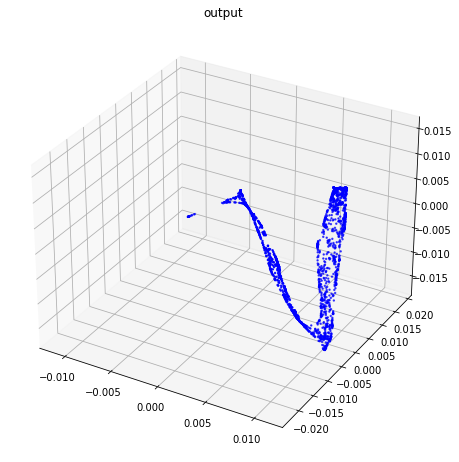

CPU times: user 531 ms, sys: 242 ms, total: 773 ms
Wall time: 215 ms


In [239]:
%%time

sigmamod = .1
EMBmod, EIGmod = modiSVD(EMBdm, EIGdm, Y,X,sigmamod, U,D, dim)

SHOW3(EMBmod[:,1],EMBmod[:,2],EMBmod[:,3],'b')

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


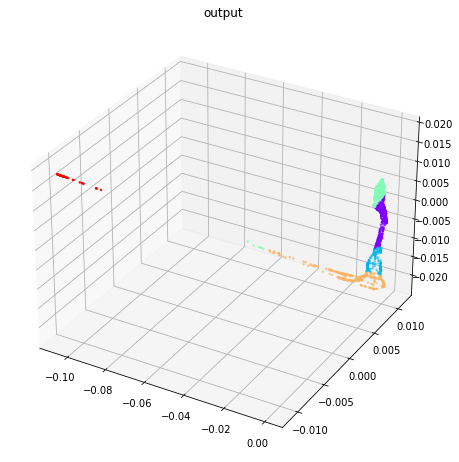

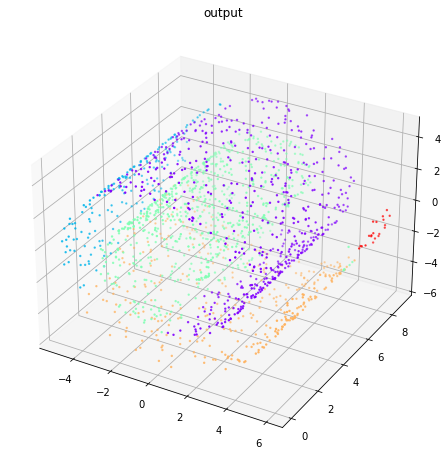

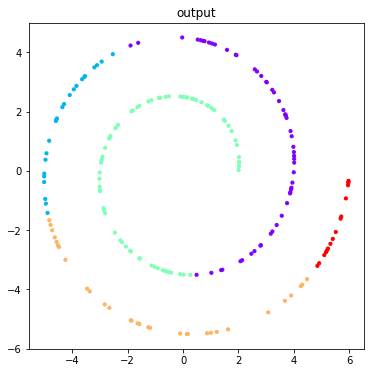

In [240]:
COLmod = COL(EMBmod[:,1:4],n+m,cluster)
SHOW3(EMBmod[:,0],EMBmod[:,1],EMBmod[:,2],COLmod)
SHOW3(X[:,0],X[:,1],X[:,2],COLmod[:n,:])
SHOW(Y[:,0],Y[:,2],COLmod[n:,:],siz=10)

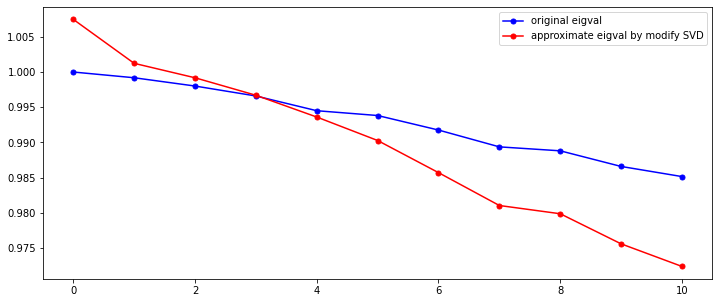

In [241]:
plt.plot(range(dim+1),EIGdm,'b-',marker='.',markersize=10,label='original eigval')
plt.plot(range(dim+1),EIGmod,'r-',marker='.',markersize=10,label='approximate eigval by modify SVD')

plt.gcf().set_size_inches(12,5)
#plt.plot(range(dim),[.8]*dim,'k-')
plt.legend()
plt.savefig('Result/eigval.png')
plt.show()

# Add points (using MDS)

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


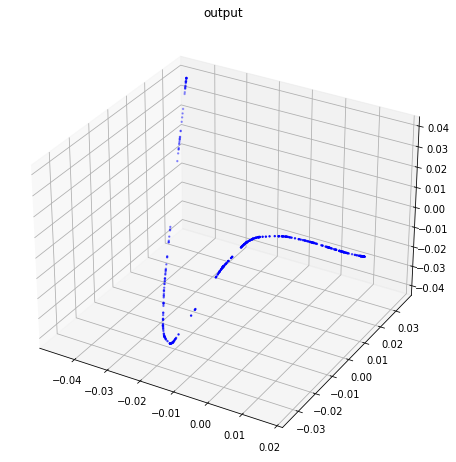

In [216]:
r = 200
Z = ori[n-r:,:]
EMBsmall,_,_,_ = DM(Z,sigmadm,dim)
SHOW3(EMBsmall[:,1],EMBsmall[:,2],EMBsmall[:,3],'b')

In [217]:
def combine(Y1,Y2,n,r):
    
    a1 = Y1[n-r,:]
    b1 = Y1[-1,:]
    m1 = (a1[0]-b1[0])/(a1[1]-b1[1])
    d1 = sqrt((a1[0]-b1[0])**2 + (a1[1]-b1[1])**2)
    
    a2 = Y2[0,:]
    b2 = Y2[r-1,:]
    m2 = (a2[0]-b2[0])/(a2[1]-b2[1])
    
    angle = math.atan((m1-m2)/(1+m1*m2))
    ang = array([[cos(angle),-sin(angle)],[sin(angle),cos(angle)]])
    
    Y2 = Y2.dot(ang)
    
    a2 = Y2[0,:]
    b2 = Y2[r-1,:]
    d2 = sqrt((a2[0]-b2[0])**2 + (a2[1]-b2[1])**2)
    
    Y2 = Y2/d2*d1
    
    a2 = Y2[0,:]
    b2 = Y2[r-1,:]
        
    Y2[:,0] += a1[0]-a2[0]
    Y2[:,1] += a1[1]-a2[1]
        
    com  = vstack((Y1,Y2[r:,:]))
        
    return com

In [218]:
%%time
EMBcom = combine(EMBdm[:,1:3],EMBsmall[:,1:3],n,r)

CPU times: user 548 µs, sys: 288 µs, total: 836 µs
Wall time: 559 µs


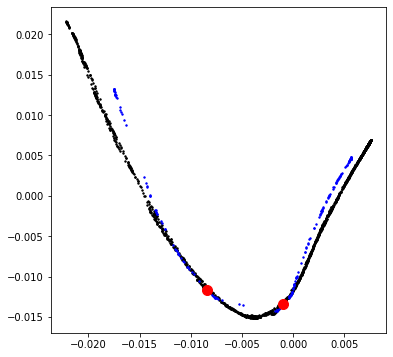

In [219]:
plt.scatter(EMBcom[:n,0], EMBcom[:n,1], s=2, c='k')
plt.scatter(EMBcom[n:,0], EMBcom[n:,1], s=2, c='b')
plt.scatter([EMBcom[n-r,0],EMBcom[n-1,0]], [EMBcom[n-r,1],EMBcom[n-1,1]], s=100, c='r')
plt.gcf().set_size_inches(6,6)

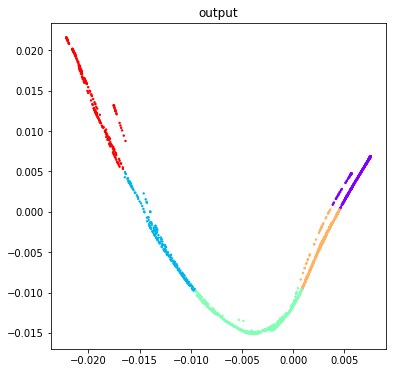

/Users/joyax/opt/anaconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


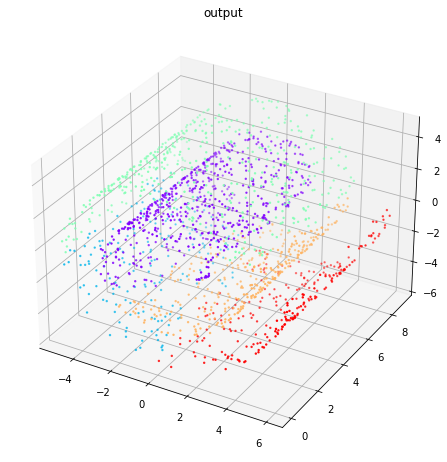

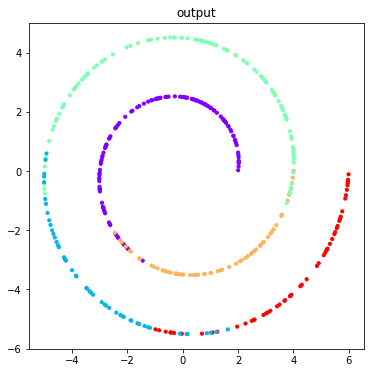

In [221]:
COLcom = COL(EMBcom,n+m,cluster)
SHOW(EMBcom[:,0],EMBcom[:,1],COLcom)
SHOW3(X[:,0],X[:,1],X[:,2],COLcom[:n,:])
SHOW(Z[:,0],Z[:,2],COLcom[n-r:,:],siz=10)